In [1]:
import sys, os, pygmt, importlib, re, time, glob
mod_path = '/home/581/da1339/AFIM/src/AFIM/src'
sys.path.insert(0, mod_path)
from sea_ice_toolbox      import SeaIceToolbox, SeaIceToolboxManager
from datetime             import timedelta, date, datetime
from pathlib              import Path
from dask.distributed     import Client, LocalCluster
from dask.diagnostics     import ProgressBar
from pyproj               import CRS, Transformer
from collections          import defaultdict
from scipy.interpolate    import interp1d
from tqdm                 import tqdm        
import numpy                as np
import pandas               as pd
import xarray               as xr
import xesmf                as xe
import matplotlib.pyplot    as plt
import matplotlib.dates     as mdates
import matplotlib.animation as animation
from IPython.display      import Image, HTML, Video
import warnings
warnings.filterwarnings("ignore", message="Sending large graph of size", category=UserWarning, module="distributed.client")

In [3]:
import sys
import importlib
for mod in list(sys.modules):
    if mod.startswith("sea_ice_toolbox") or mod.startswith("sea_ice_"):
        del sys.modules[mod]
import sea_ice_plotter
import sea_ice_classification
import sea_ice_icebergs
import sea_ice_observations
import sea_ice_metrics
import sea_ice_toolbox
importlib.reload(sea_ice_plotter)
importlib.reload(sea_ice_classification)
importlib.reload(sea_ice_icebergs)
importlib.reload(sea_ice_observations)
importlib.reload(sea_ice_metrics)
importlib.reload(sea_ice_toolbox)
from sea_ice_toolbox import SeaIceToolbox, SeaIceToolboxManager

2025-08-14 10:41:30,351 - INFO - log file connected: /home/581/da1339/logs/paper1_sandbox2.log
2025-08-14 10:41:30,356 - INFO - Dask Client Connected
  Dashboard      : /proxy/33371/status
  Threads        : 2
  Threads/Worker : [1, 1]
  Total Memory   : 14.00 GB

2025-08-14 10:41:30,357 - INFO - hemisphere initialised: SH
2025-08-14 10:41:30,359 - INFO - reading /g/data/gv90/da1339/afim_output/notensnogi/ice_diag.d to construct /g/data/gv90/da1339/afim_output/notensnogi/ice_in_AFIM_subset_notensnogi.json
2025-08-14 10:41:30,363 - INFO -  self.ice_class defined as FI_BT
2025-08-14 10:41:30,365 - INFO - --- SeaIceToolbox Summary ---
2025-08-14 10:41:30,366 - INFO - Simulation Name     : notensnogi
2025-08-14 10:41:30,367 - INFO - Analysis Start Date : 1994-01-01
2025-08-14 10:41:30,371 - INFO - Analysis End Date   : 1999-12-31
2025-08-14 10:41:30,372 - INFO - Speed Threshold     : 5.0e-04 m/s
2025-08-14 10:41:30,374 - INFO - Speed Type(s)       : BT
2025-08-14 10:41:30,375 - INFO - Ice 

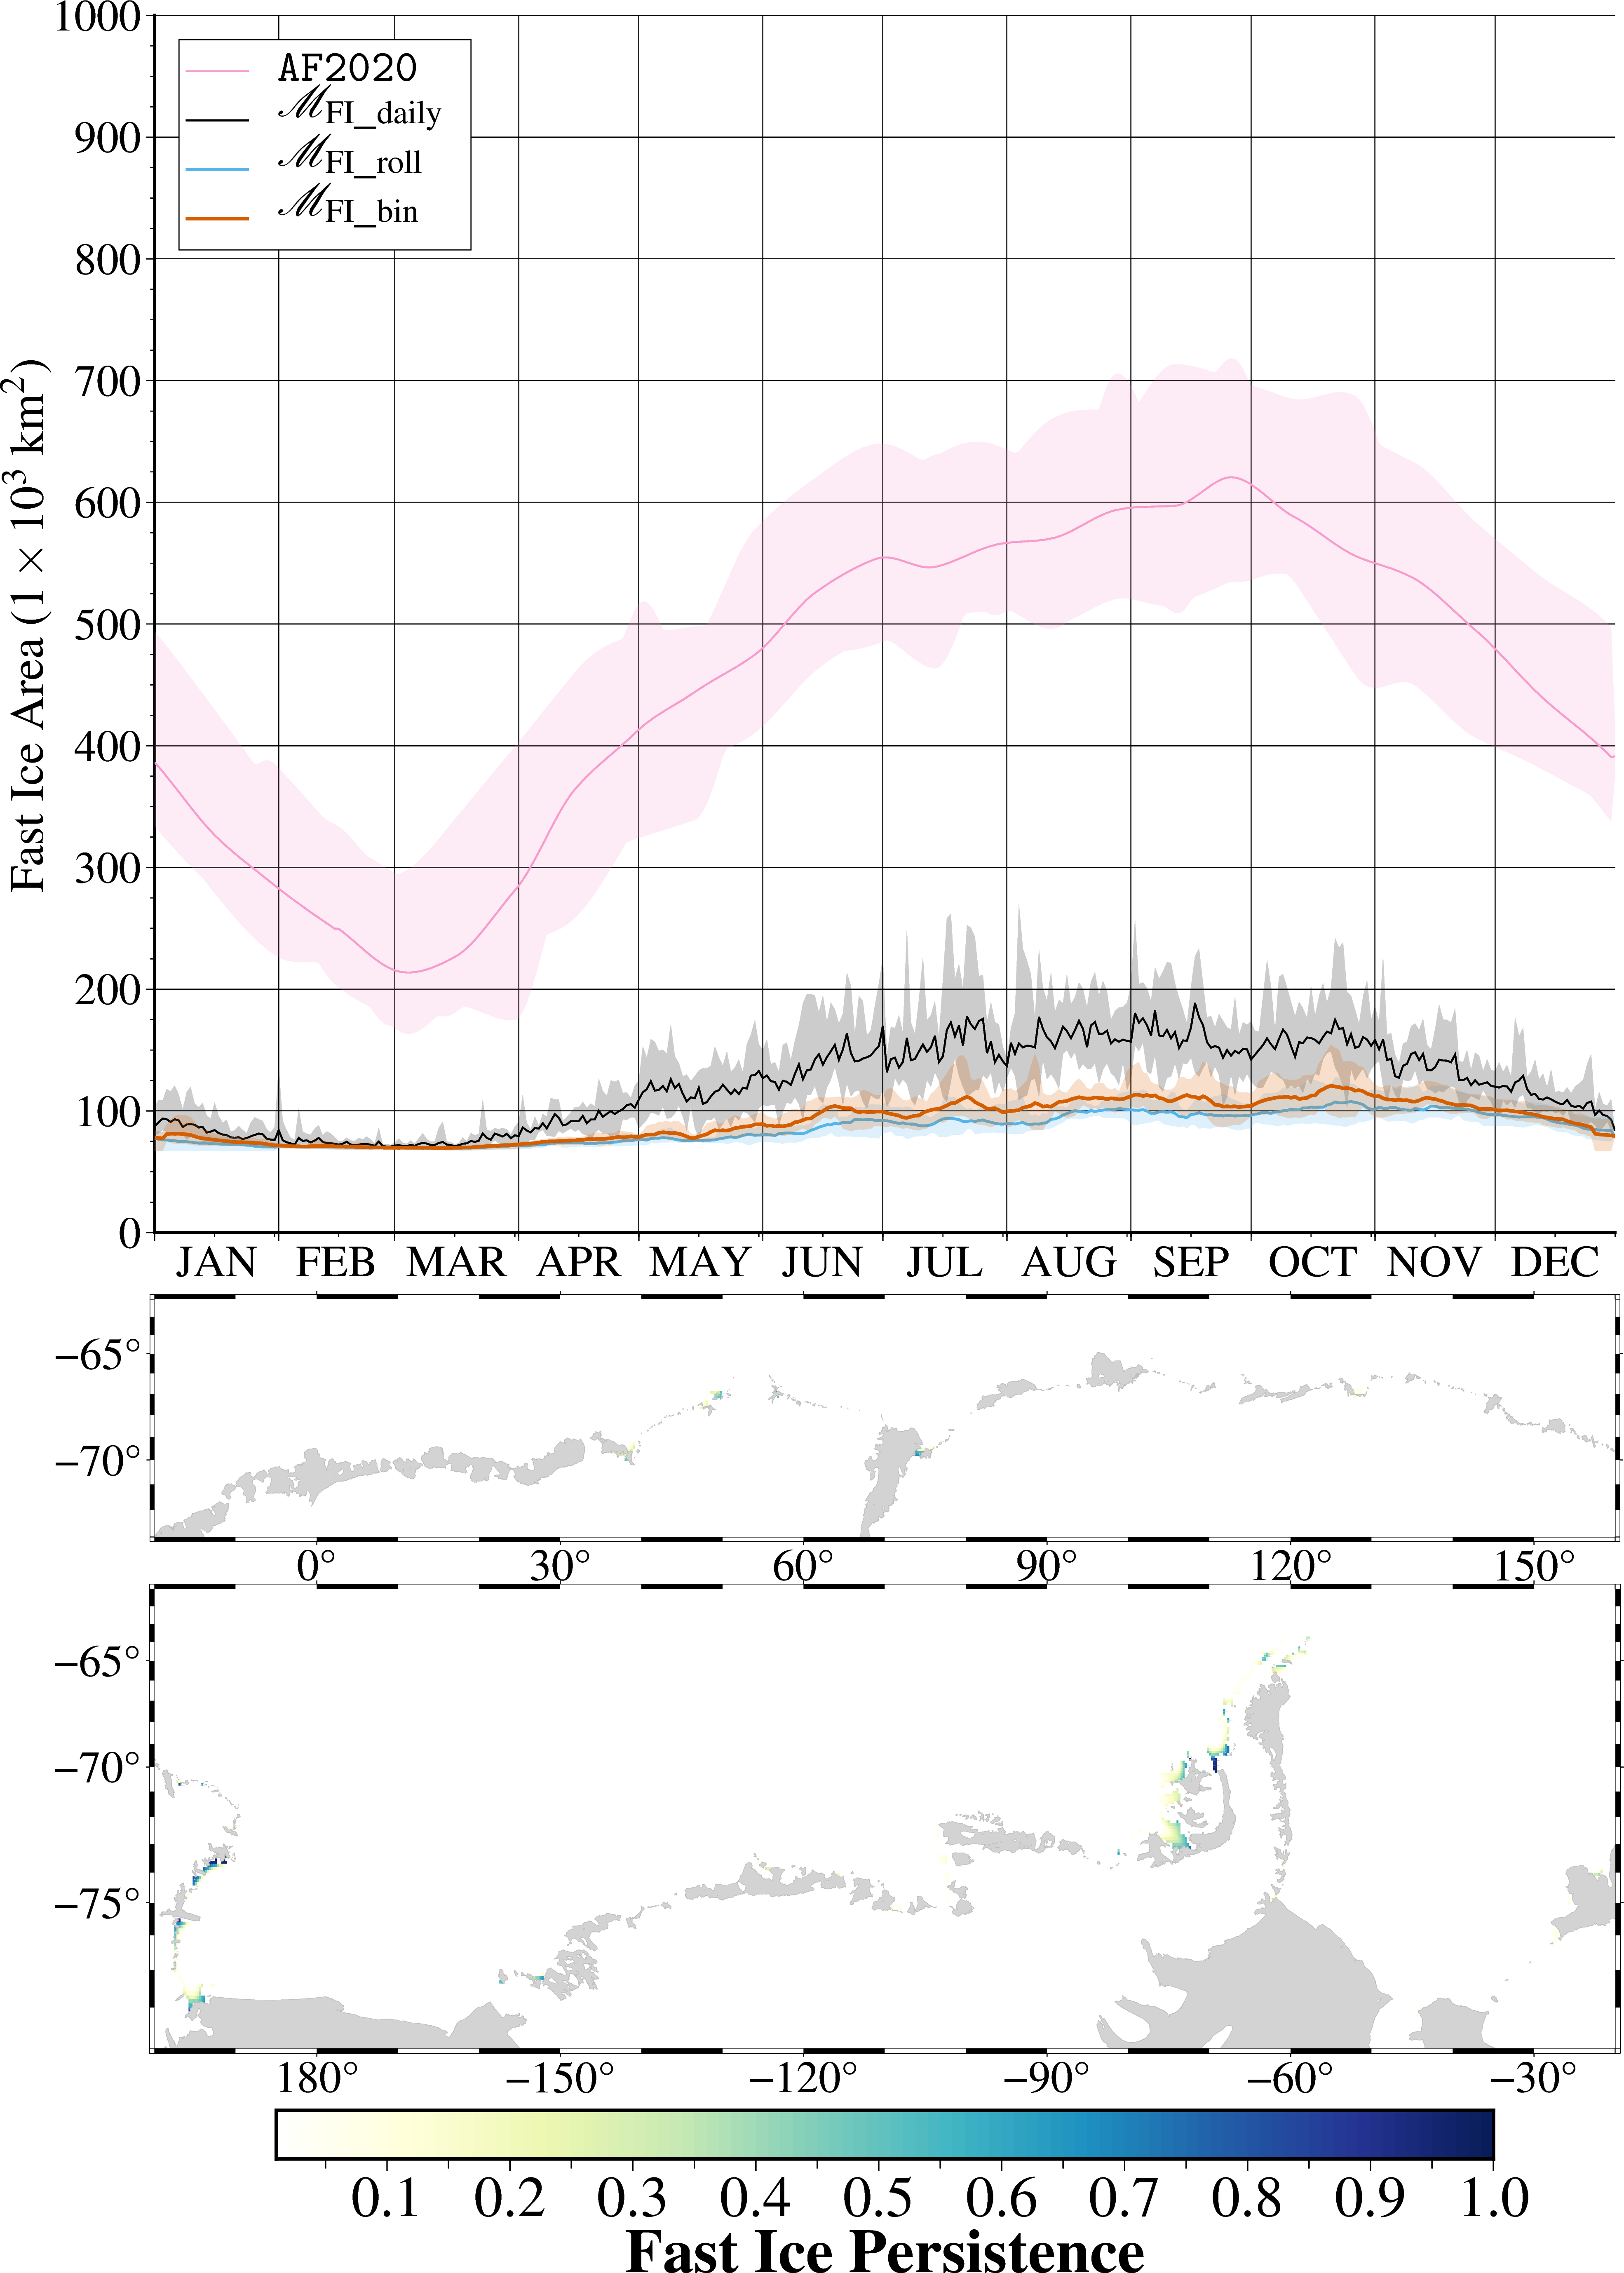

2025-08-14 10:42:27,828 - INFO - FI_BT simulation will be included in extract_min_max_dates()
2025-08-14 10:42:27,833 - INFO - FI_BT_roll simulation will be included in extract_min_max_dates()
2025-08-14 10:42:27,846 - INFO - FI_BT_bin simulation will be included in extract_min_max_dates()
2025-08-14 10:42:33,600 - INFO - Hemisphere slice applied on 'nj' for Dataset.
2025-08-14 10:42:33,603 - INFO - Hemisphere slice applied on 'nj' for Dataset.
2025-08-14 10:42:33,607 - INFO - preparing the data for plotting
2025-08-14 10:42:33,608 - INFO -    using T-grid
INFO:pyogrio._io:Created 357 records
INFO:pyogrio._io:Created 357 records
2025-08-14 10:42:49,163 - INFO - saved figure to /g/data/gv90/da1339/GRAPHICAL/AFIM/notensnogi/FIT_FIHI_notensnogi_ispd_thresh5.0e-4_1994-1999.png
2025-08-14 10:42:50,128 - INFO - FI_BT simulation will be included in extract_min_max_dates()
2025-08-14 10:42:50,130 - INFO - FI_BT_roll simulation will be included in extract_min_max_dates()
2025-08-14 10:42:50,132

In [ ]:
sim_name    = "notensnogi"
dt0_str     = "1994-01-01"
dtN_str     = "1999-12-31"
P_log       = Path(Path.home(), "logs", "paper1_sandbox2.log")
SI_tool_mgr = SeaIceToolboxManager(P_log=P_log)
skip_names  = {"pack_ice.zarr","ice_diag_summary.csv","CMEMS-ORAS","AOM2-ERA5","AFIM_archive_status.json"}
for item in ["notensnogi"]:#Path(SI_tools.D_dict["AFIM_out"]).iterdir():
    # if item.name in skip_names:
    #     continue
    sim_name = item#.name
    SI_tools = SI_tool_mgr.get_toolbox(dt0_str  = dt0_str,
                                       dtN_str  = dtN_str,
                                       sim_name = sim_name)
    SI_tools.pygmt_fastice_panel(fast_ice_variable = "FIA",   
                                 ice_class         = "FI_BT", 
                                 class_type        = "bin",   
                                 sim_name          = sim_name,
                                 font_annot_pri    = "26p,Times-Roman",
                                 font_lab          = "28p,Times-Bold",
                                 overwrite_fig     = True,
                                 show_fig          = True)
    SI_tools.pygmt_fastice_panel(fast_ice_variable = "FIT",   
                                 ice_class         = "FI_BT", 
                                 class_type        = "bin",   
                                 sim_name          = sim_name,
                                 font_annot_pri    = "26p,Times-Roman",
                                 font_lab          = "28p,Times-Bold",
                                 overwrite_fig     = True,
                                 show_fig          = False)
    SI_tools.pygmt_fastice_panel(fast_ice_variable = "FIS",   
                                 ice_class         = "FI_BT", 
                                 class_type        = "bin",   
                                 sim_name          = sim_name,
                                 font_annot_pri    = "26p,Times-Roman",
                                 font_lab          = "28p,Times-Bold",
                                 overwrite_fig     = True,
                                 show_fig          = False)
    SI_tools.pygmt_fastice_panel(fast_ice_variable = "FIMAR",   
                                 ice_class         = "FI_BT", 
                                 class_type        = "bin",   
                                 sim_name          = sim_name,
                                 font_annot_pri    = "26p,Times-Roman",
                                 font_lab          = "28p,Times-Bold",
                                 water_clr         = "#F4A582",
                                 overwrite_fig     = True,
                                 show_fig          = False)
    SI_tools.pygmt_fastice_panel(fast_ice_variable = "FIMVR",   
                                 ice_class         = "FI_BT", 
                                 class_type        = "bin",   
                                 sim_name          = sim_name,
                                 font_annot_pri    = "26p,Times-Roman",
                                 font_lab          = "28p,Times-Bold",
                                 water_clr         = "#F4A582",
                                 overwrite_fig     = True,
                                 show_fig          = False)
    SI_tools.pygmt_fastice_panel(fast_ice_variable = "FITAR",   
                                 ice_class         = "FI_BT", 
                                 class_type        = "bin",   
                                 sim_name          = sim_name,
                                 font_annot_pri    = "26p,Times-Roman",
                                 font_lab          = "28p,Times-Bold",
                                 water_clr         = "#F4A582",
                                 overwrite_fig     = True,
                                 show_fig          = False)
    SI_tools.pygmt_fastice_panel(fast_ice_variable = "FITVR",   
                                 ice_class         = "FI_BT", 
                                 class_type        = "bin",   
                                 sim_name          = sim_name,
                                 font_annot_pri    = "26p,Times-Roman",
                                 font_lab          = "28p,Times-Bold",
                                 water_clr         = "#F4A582",
                                 overwrite_fig     = True,
                                 show_fig          = False)

2025-08-14 12:30:18,388 - INFO - log file connected: /home/581/da1339/logs/paper1_sandbox2.log
2025-08-14 12:30:18,392 - INFO - Dask Client Connected
  Dashboard      : /proxy/33923/status
  Threads        : 2
  Threads/Worker : [1, 1]
  Total Memory   : 14.00 GB

2025-08-14 12:30:18,392 - INFO - hemisphere initialised: SH
2025-08-14 12:30:18,393 - INFO - reading /g/data/gv90/da1339/afim_output/ndte-max/ice_diag.d to construct /g/data/gv90/da1339/afim_output/ndte-max/ice_in_AFIM_subset_ndte-max.json
2025-08-14 12:30:18,395 - INFO -  self.ice_class defined as FI_BT
2025-08-14 12:30:18,396 - INFO - --- SeaIceToolbox Summary ---
2025-08-14 12:30:18,396 - INFO - Simulation Name     : ndte-max
2025-08-14 12:30:18,397 - INFO - Analysis Start Date : 1994-01-01
2025-08-14 12:30:18,397 - INFO - Analysis End Date   : 1999-12-31
2025-08-14 12:30:18,398 - INFO - Speed Threshold     : 5.0e-04 m/s
2025-08-14 12:30:18,399 - INFO - Speed Type(s)       : BT
2025-08-14 12:30:18,400 - INFO - Ice Type(s) 

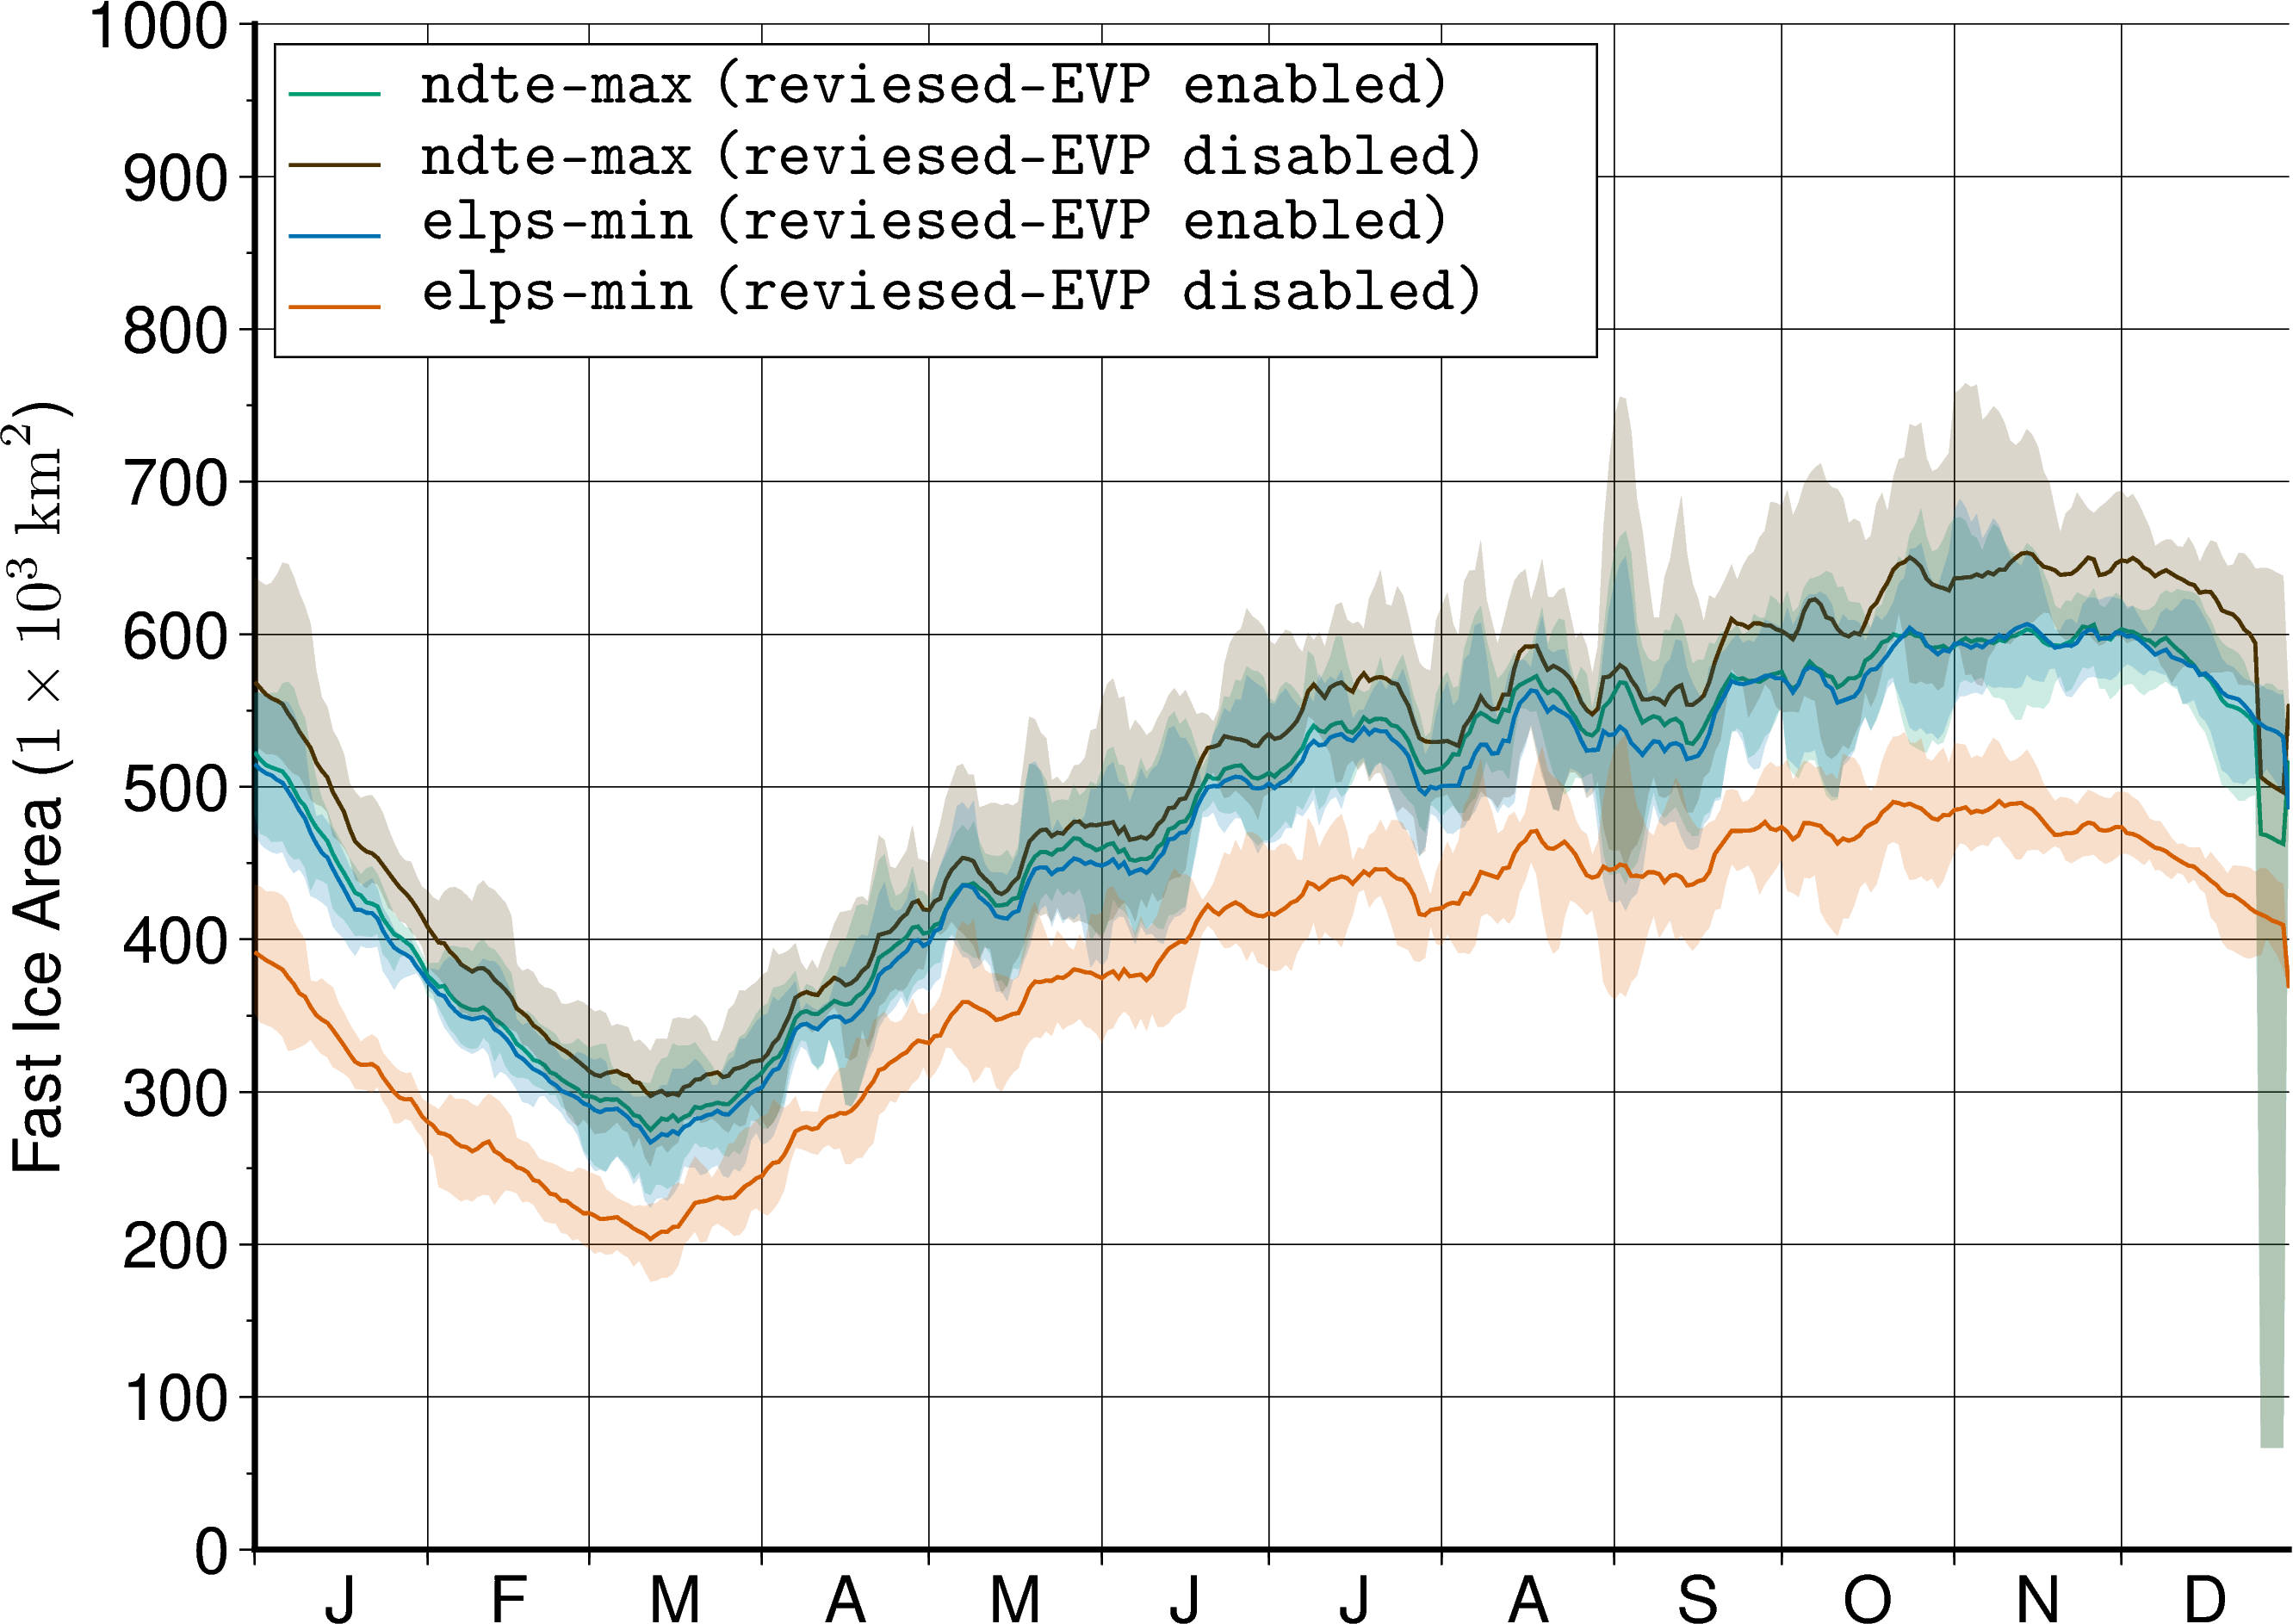

2025-08-14 12:30:24,703 - INFO - ndte-max simulation will be included in extract_min_max_dates()
2025-08-14 12:30:24,705 - INFO - ndte-max-re-off simulation will be included in extract_min_max_dates()
2025-08-14 12:30:24,707 - INFO - elps-min simulation will be included in extract_min_max_dates()
2025-08-14 12:30:24,708 - INFO - re-evp-off simulation will be included in extract_min_max_dates()
2025-08-14 12:30:25,170 - INFO - pulling out data array for ndte-max and putting into dataframe
2025-08-14 12:30:25,170 - INFO - legend label: @[\texttt{ndte-max}\ \texttt{(reviesed-EVP \textbf{en}abled)}@[
2025-08-14 12:30:25,171 - INFO - line color  : #009E73
2025-08-14 12:30:25,284 - INFO - pulling out data array for ndte-max-re-off and putting into dataframe
2025-08-14 12:30:25,284 - INFO - legend label: @[\texttt{ndte-max}\ \texttt{(reviesed-EVP \textbf{dis}abled)}@[
2025-08-14 12:30:25,285 - INFO - line color  : #4A3100
2025-08-14 12:30:25,388 - INFO - pulling out data array for elps-min an

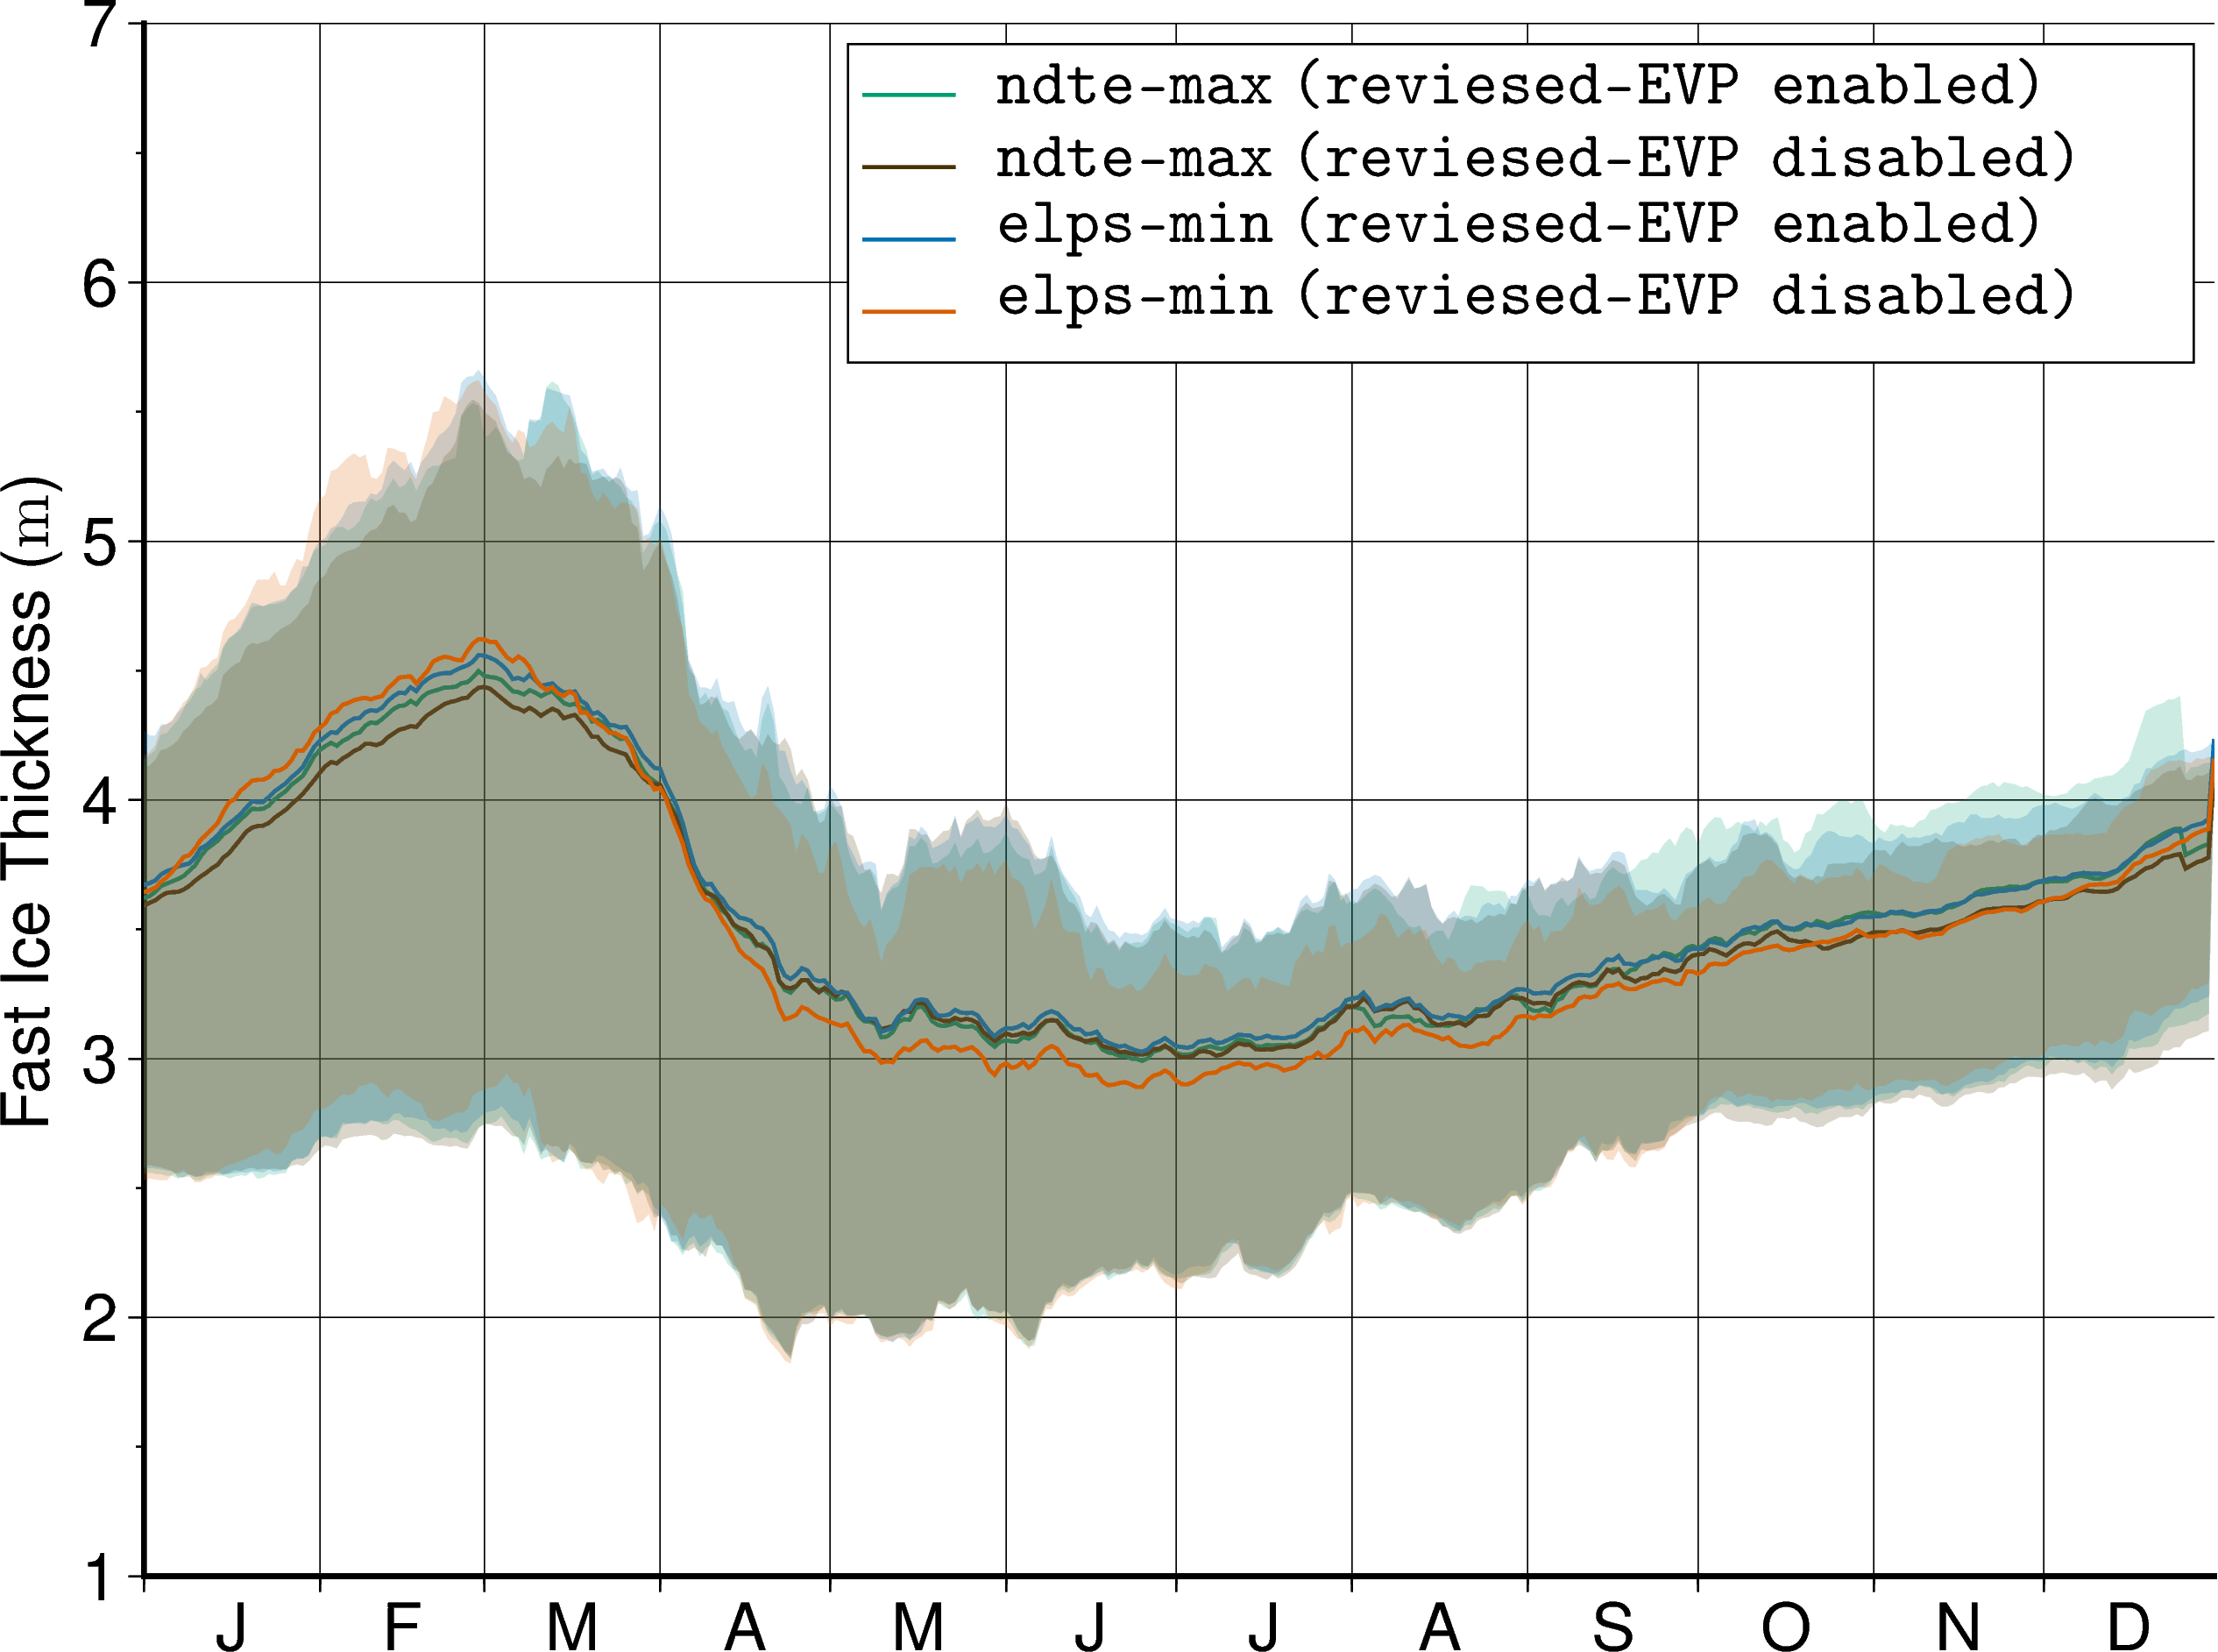

2025-08-14 12:30:30,607 - INFO - ndte-max simulation will be included in extract_min_max_dates()
2025-08-14 12:30:30,611 - INFO - ndte-max-re-off simulation will be included in extract_min_max_dates()
2025-08-14 12:30:30,613 - INFO - elps-min simulation will be included in extract_min_max_dates()
2025-08-14 12:30:30,614 - INFO - re-evp-off simulation will be included in extract_min_max_dates()
2025-08-14 12:30:31,083 - INFO - pulling out data array for ndte-max and putting into dataframe
2025-08-14 12:30:31,089 - INFO - legend label: @[\texttt{ndte-max}\ \texttt{(reviesed-EVP \textbf{en}abled)}@[
2025-08-14 12:30:31,089 - INFO - line color  : #009E73
2025-08-14 12:30:31,194 - INFO - pulling out data array for ndte-max-re-off and putting into dataframe
2025-08-14 12:30:31,195 - INFO - legend label: @[\texttt{ndte-max}\ \texttt{(reviesed-EVP \textbf{dis}abled)}@[
2025-08-14 12:30:31,196 - INFO - line color  : #4A3100
2025-08-14 12:30:31,344 - INFO - pulling out data array for elps-min an

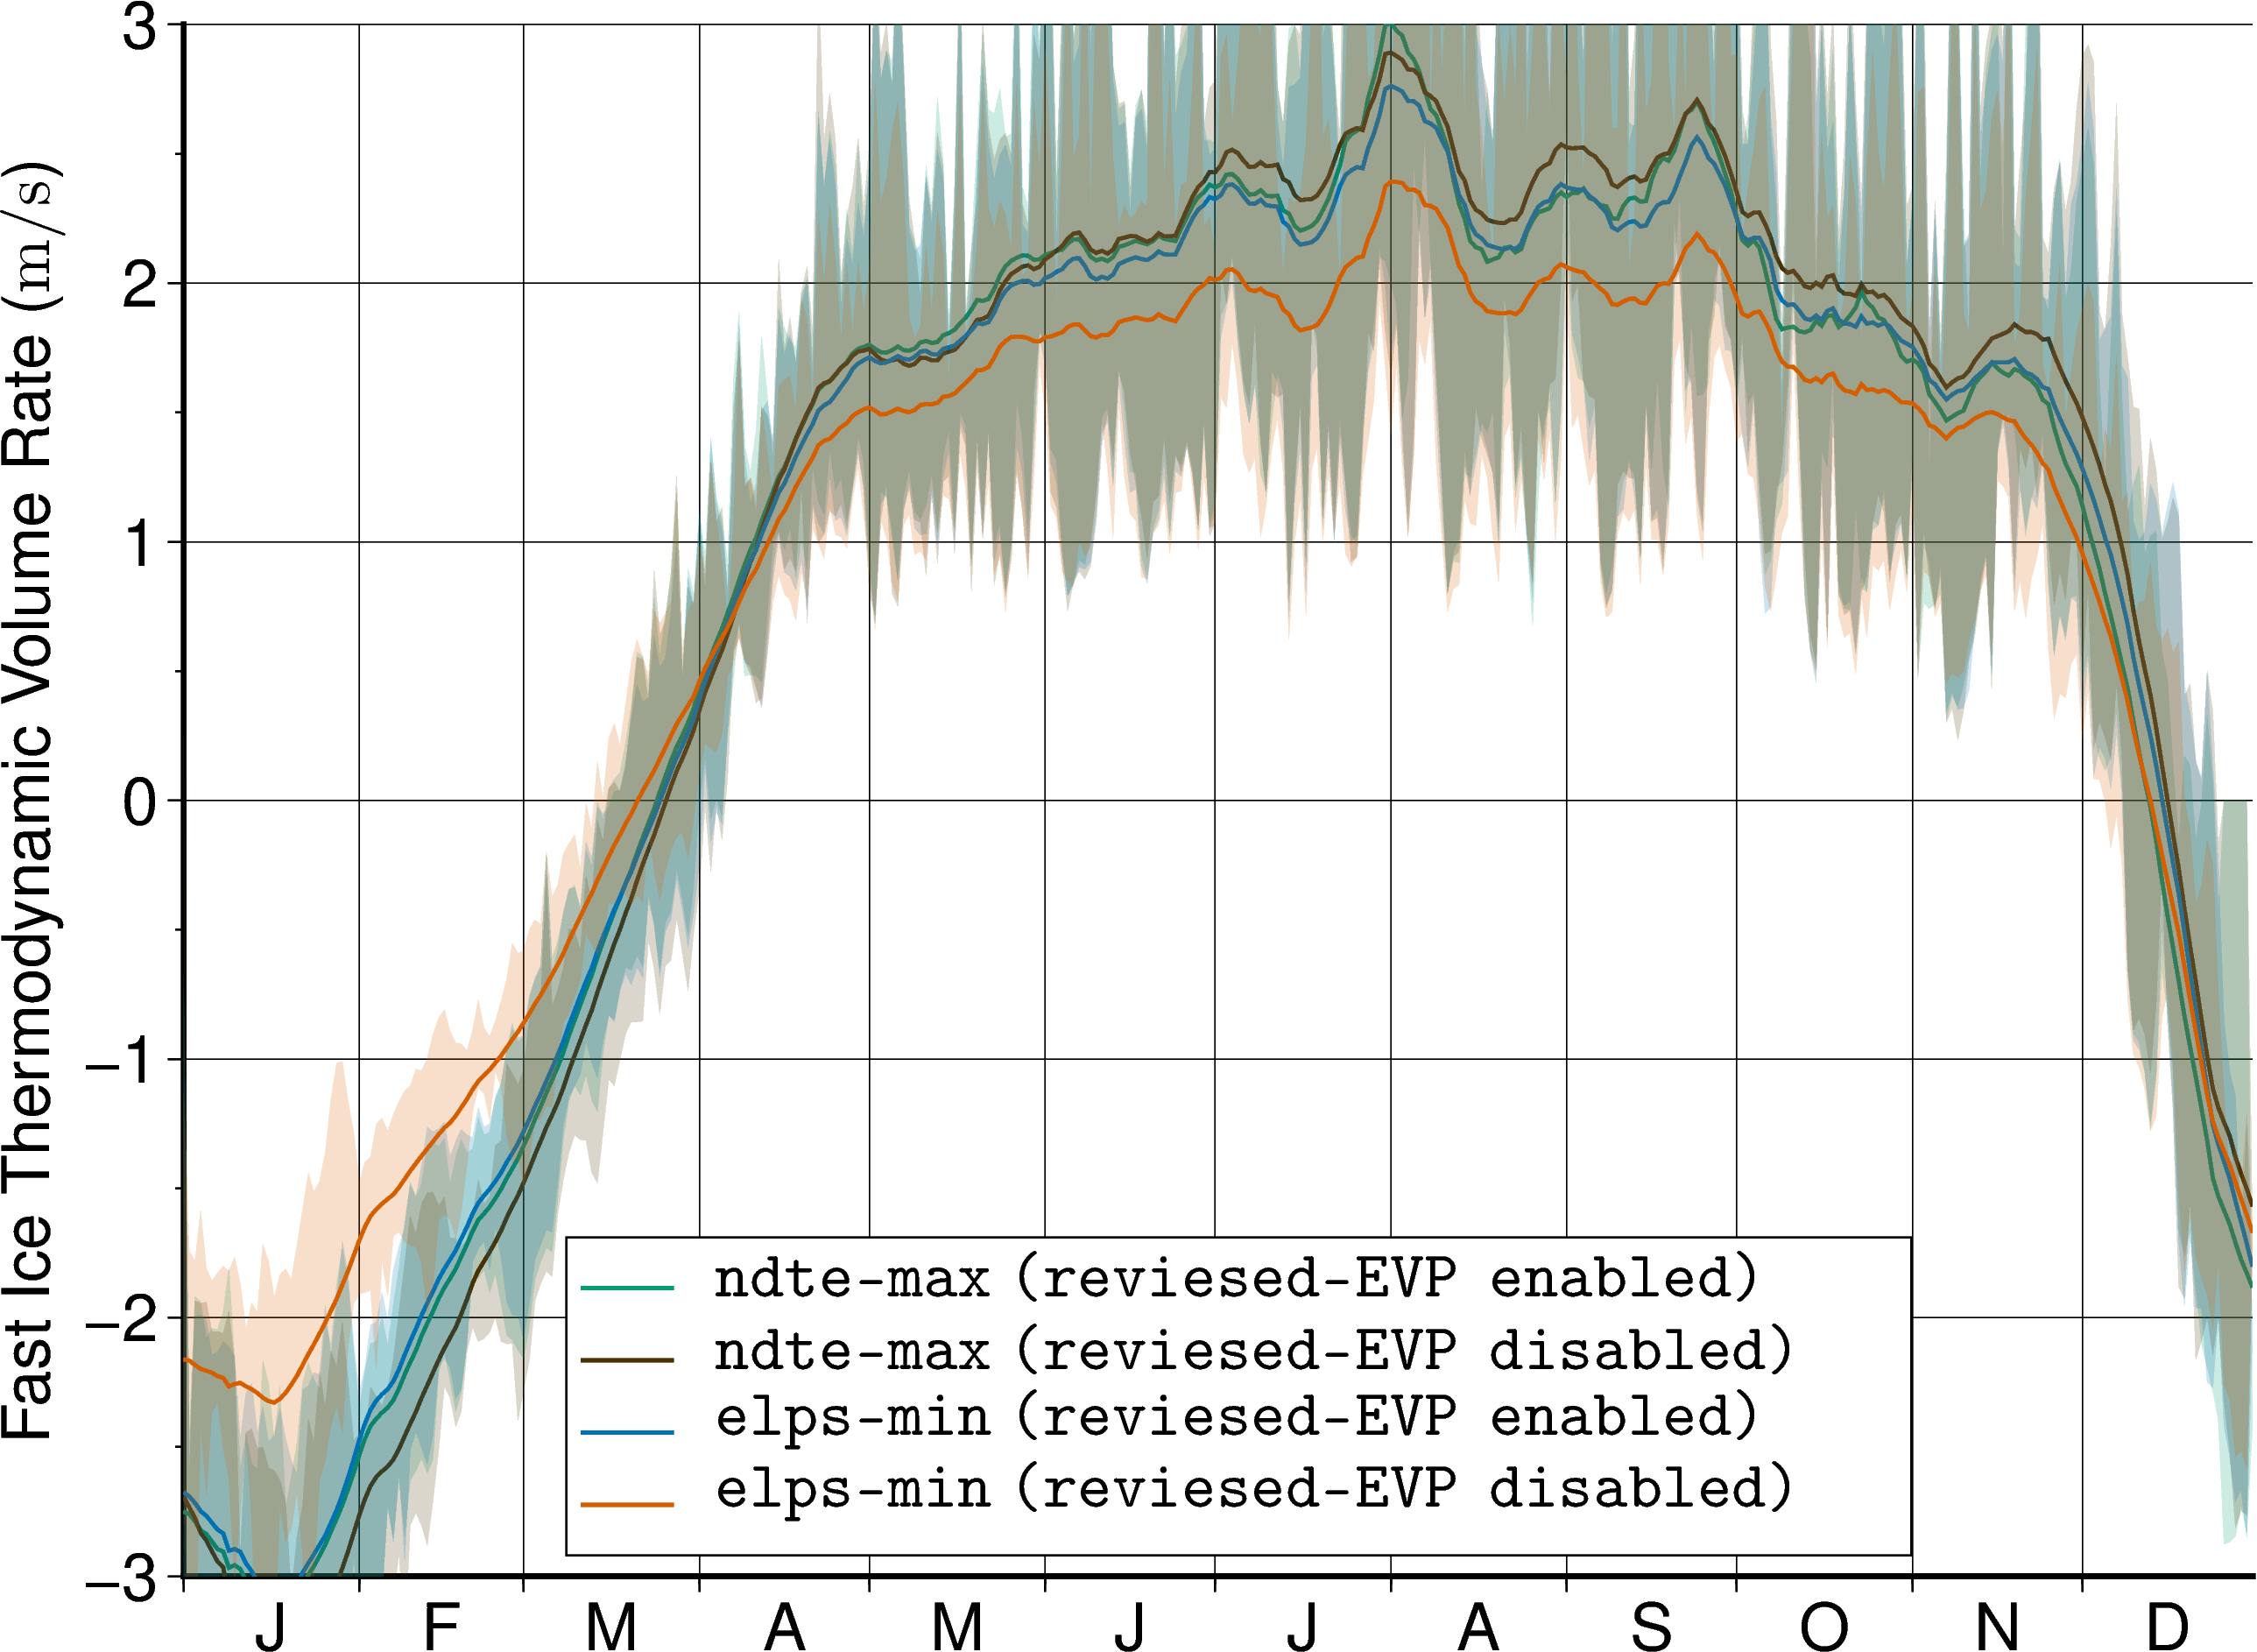

2025-08-14 12:30:37,023 - INFO - ndte-max simulation will be included in extract_min_max_dates()
2025-08-14 12:30:37,024 - INFO - ndte-max-re-off simulation will be included in extract_min_max_dates()
2025-08-14 12:30:37,025 - INFO - elps-min simulation will be included in extract_min_max_dates()
2025-08-14 12:30:37,026 - INFO - re-evp-off simulation will be included in extract_min_max_dates()
2025-08-14 12:30:37,469 - INFO - pulling out data array for ndte-max and putting into dataframe
2025-08-14 12:30:37,470 - INFO - legend label: @[\texttt{ndte-max}\ \texttt{(reviesed-EVP \textbf{en}abled)}@[
2025-08-14 12:30:37,471 - INFO - line color  : #009E73
2025-08-14 12:30:37,563 - INFO - pulling out data array for ndte-max-re-off and putting into dataframe
2025-08-14 12:30:37,564 - INFO - legend label: @[\texttt{ndte-max}\ \texttt{(reviesed-EVP \textbf{dis}abled)}@[
2025-08-14 12:30:37,564 - INFO - line color  : #4A3100
2025-08-14 12:30:37,665 - INFO - pulling out data array for elps-min an

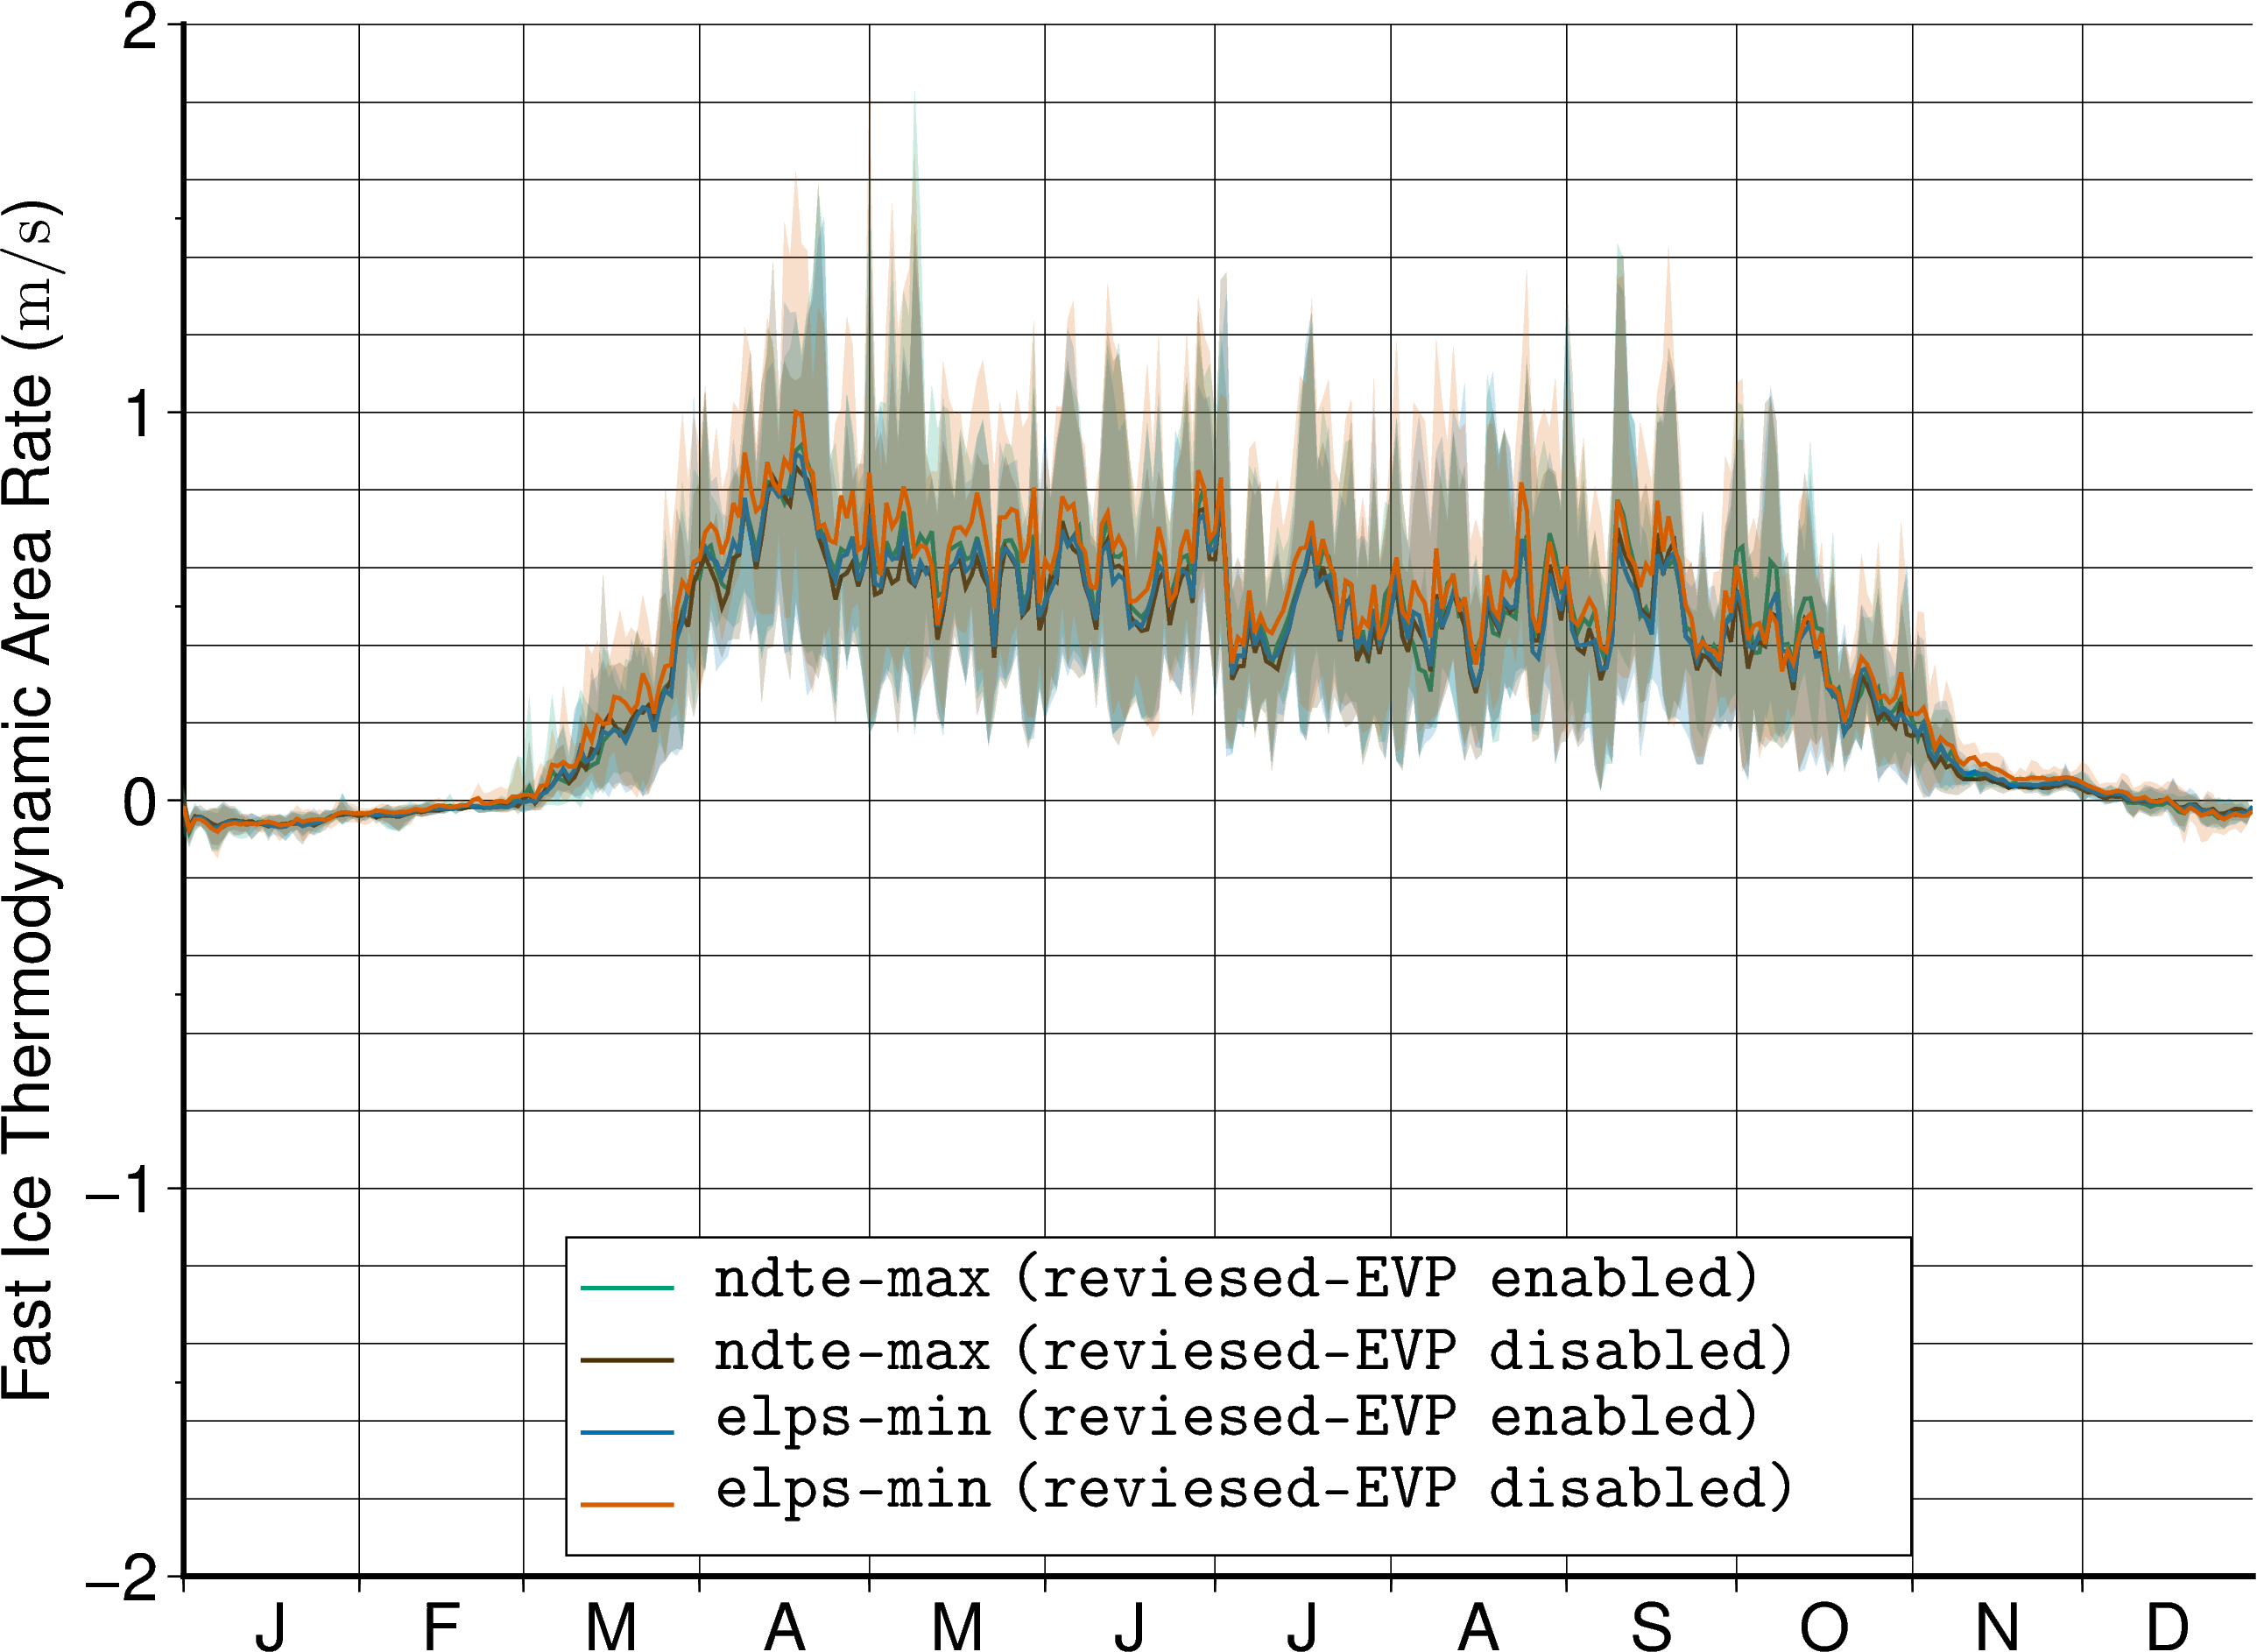

2025-08-14 12:30:42,658 - INFO - ndte-max simulation will be included in extract_min_max_dates()
2025-08-14 12:30:42,660 - INFO - ndte-max-re-off simulation will be included in extract_min_max_dates()
2025-08-14 12:30:42,661 - INFO - elps-min simulation will be included in extract_min_max_dates()
2025-08-14 12:30:42,662 - INFO - re-evp-off simulation will be included in extract_min_max_dates()
2025-08-14 12:30:43,208 - INFO - pulling out data array for ndte-max and putting into dataframe
2025-08-14 12:30:43,210 - INFO - legend label: @[\texttt{ndte-max}\ \texttt{(reviesed-EVP \textbf{en}abled)}@[
2025-08-14 12:30:43,211 - INFO - line color  : #009E73
2025-08-14 12:30:43,327 - INFO - pulling out data array for ndte-max-re-off and putting into dataframe
2025-08-14 12:30:43,329 - INFO - legend label: @[\texttt{ndte-max}\ \texttt{(reviesed-EVP \textbf{dis}abled)}@[
2025-08-14 12:30:43,329 - INFO - line color  : #4A3100
2025-08-14 12:30:43,425 - INFO - pulling out data array for elps-min an

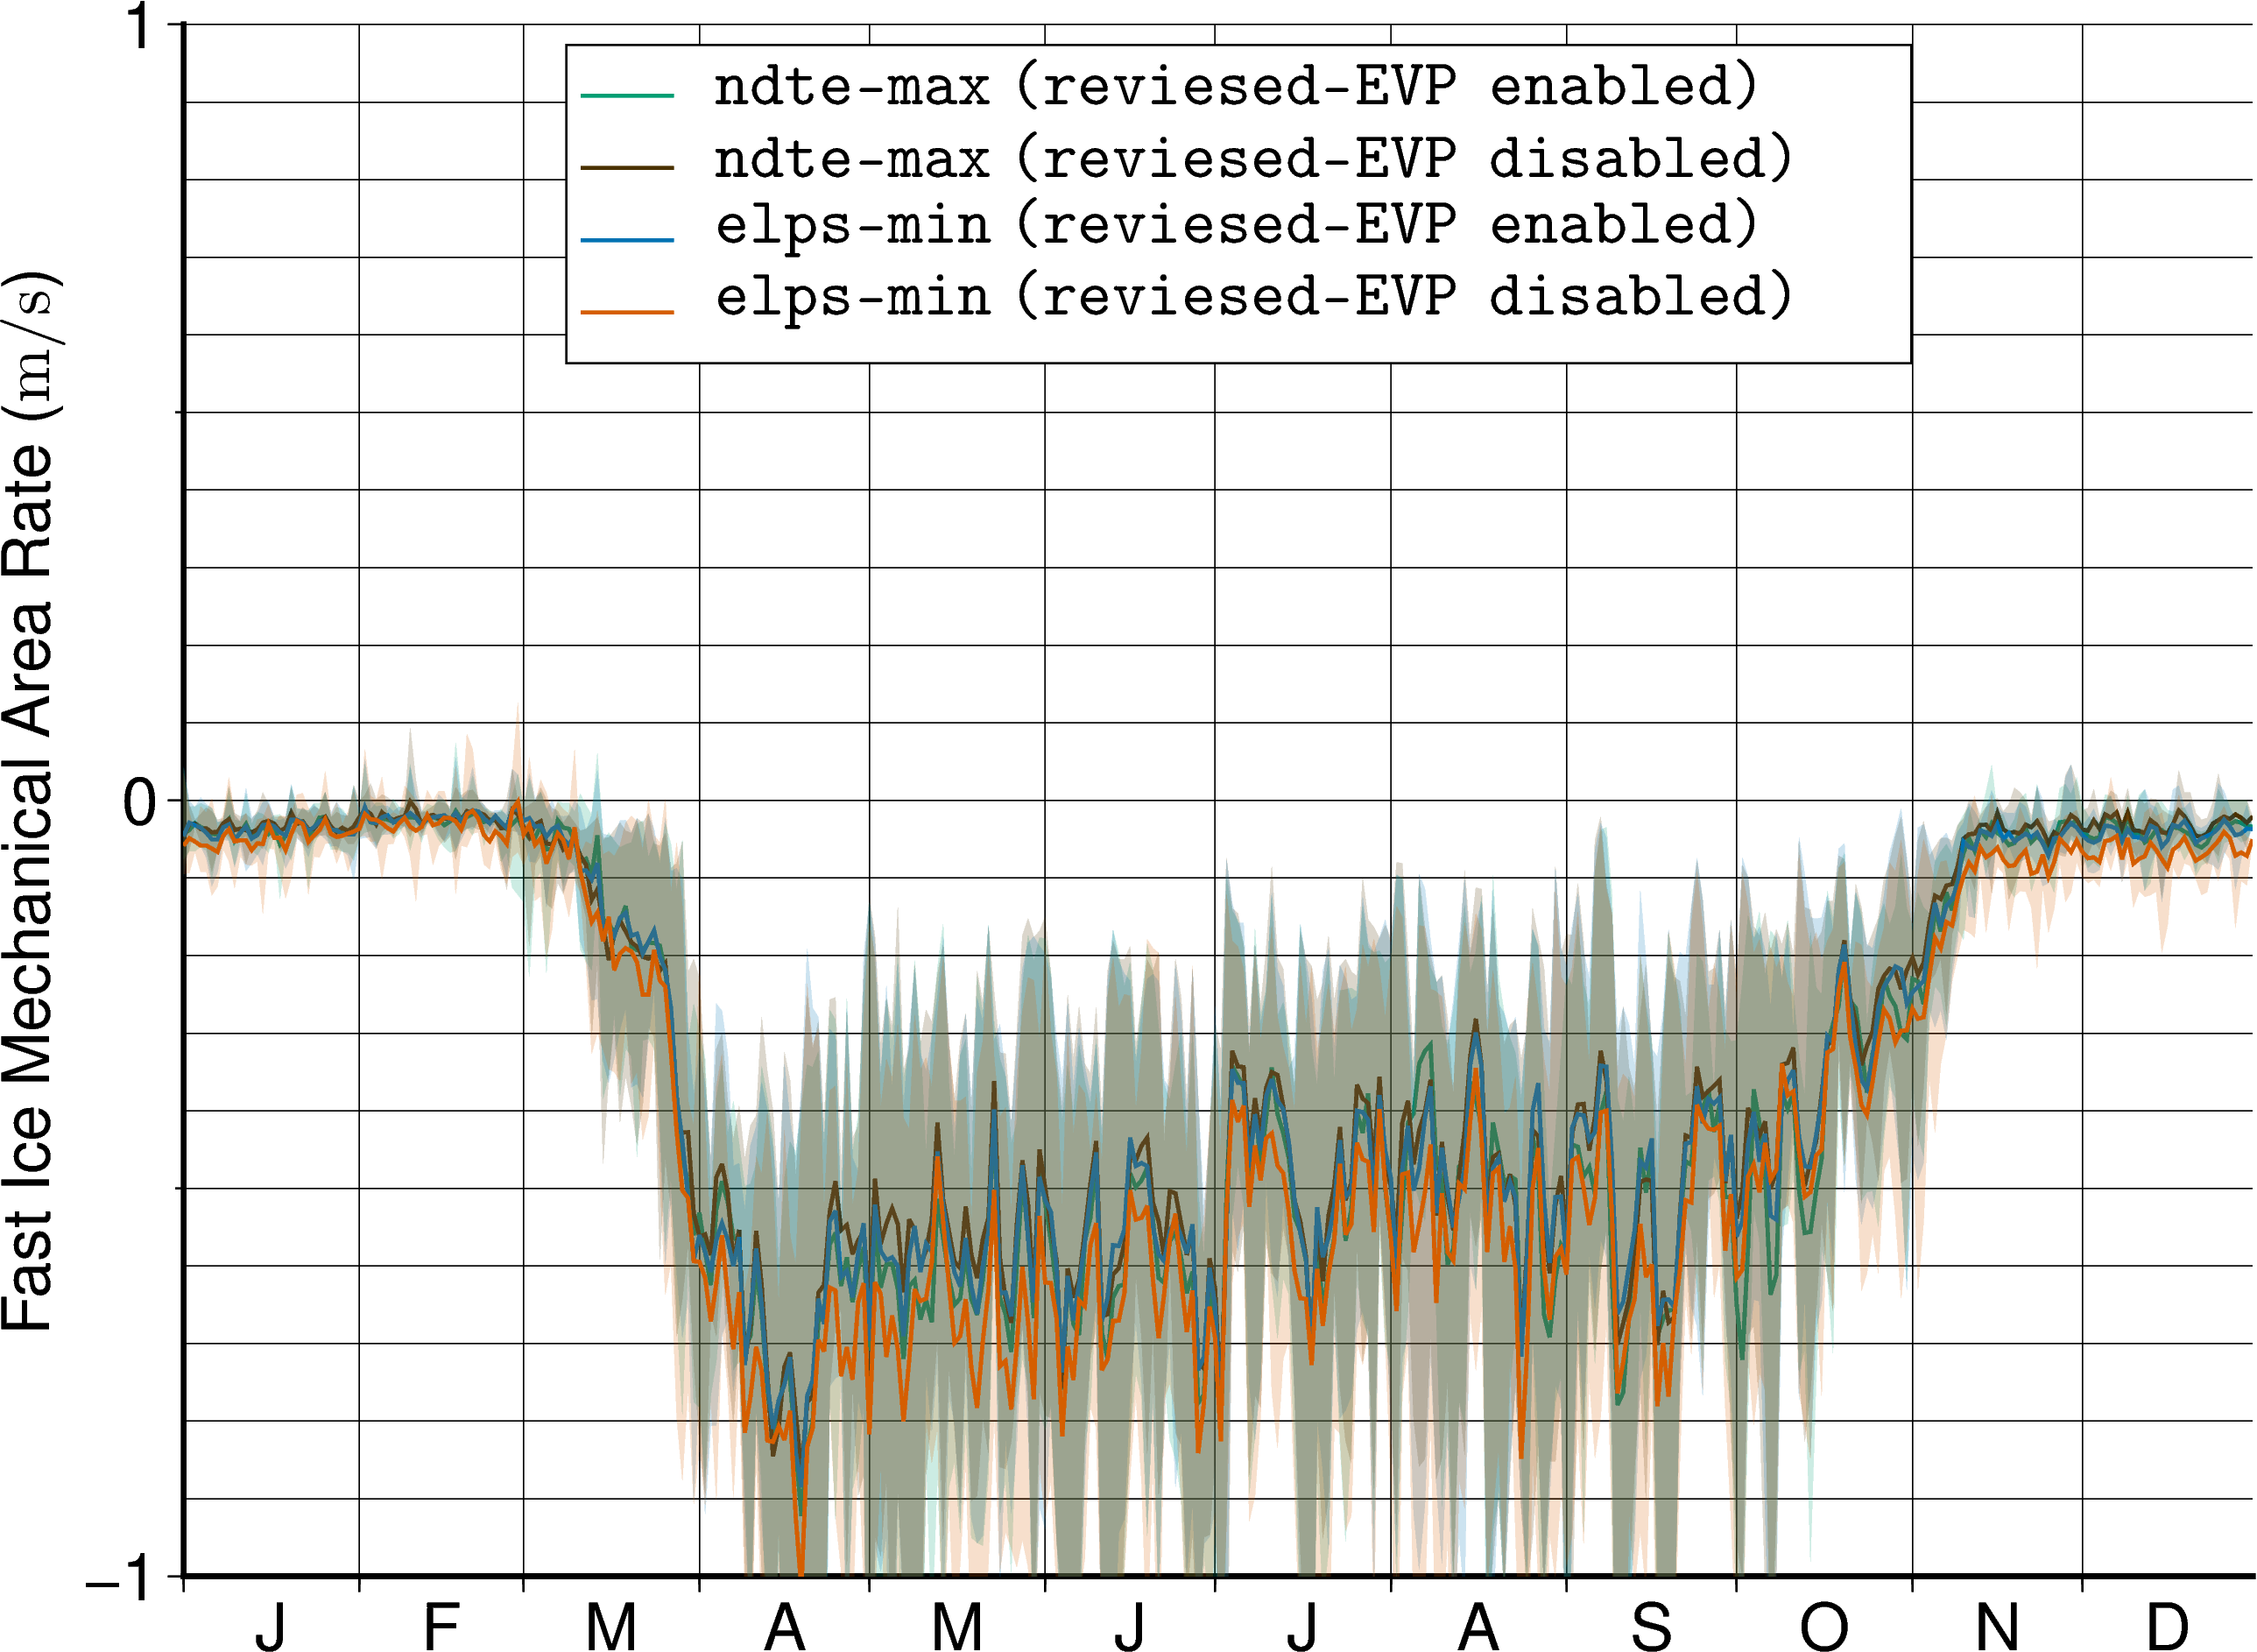

In [6]:
sim_name    = "__dummy__"
dt0_str     = "1994-01-01"
dtN_str     = "1999-12-31"
P_log       = Path(Path.home(), "logs", "paper1_sandbox2.log")
SI_tool_mgr = SeaIceToolboxManager(P_log=P_log)
sim_names   = ["ndte-max","ndte-max-re-off","elps-min","re-evp-off"]#"elps-min",
comp_name   = "re-evp-comparison"
# "Cstar-comparison" : "@[\\texttt{gi-mid}\\ \\mathrm{C}^{\\ast}=20@["
# "Pstar-comparison" : "@[\\texttt{gi-mid}\\ \\mathrm{P}^{\\ast}=2.75\\times10^4@["
# "ktens-comparison" : "@[\\texttt{gi-mid}\\ k_{T}=0.2@[", ["ktens-ext","ktens-max","gi-mid","ktens-min","ktens-nil"]
# "ktens-comparison" : "@[\\texttt{gi-mid}\\ \\mathrm{e}=2.0@[", ["elps-max","gi-mid","elps-mid","elps-min","elps-ext"]
FIA_dict    = {}
FIT_dict    = {}
FITVR_dict  = {}
FITAR_dict  = {}
FIMAR_dict  = {}
for sim_name in sim_names:
    SI_tools = SI_tool_mgr.get_toolbox(sim_name = sim_name, dt0_str=dt0_str, dtN_str=dtN_str)
    P_zarr   = Path(SI_tools.D_ispd_thresh, "FI_BT_bin_mets.zarr")
    SI_tools.logger.info(f"opening zarr met file: {P_zarr}")
    ds = xr.open_zarr(P_zarr, consolidated=False)
    FIA_dict[sim_name] = {'FIA' : ds['FIA']}
    FIT_dict[sim_name] = {'FIT' : ds['FIT']}
    FITVR_dict[sim_name] = {'FITVR' : ds['FITVR']}
    FITAR_dict[sim_name] = {'FITAR' : ds['FITAR']}
    FIMAR_dict[sim_name] = {'FIMAR' : ds['FIMAR']}

SI_tools.pygmt_timeseries(FIA_dict, 
                          comp_name   = comp_name,
                          primary_key = "FIA",
                          climatology = True,
                          ylabel      = "Fast Ice Area (@[1\\times10^3\\ \\mathrm{km}^2@[)",
                          show_fig    = True, 
                          legend_pos  = "JTL+jTL+o0.2c+w13c")
SI_tools.pygmt_timeseries(FIT_dict, 
                          comp_name   = comp_name,
                          primary_key = "FIT",
                          climatology = True,
                          ylabel      = "Fast Ice Thickness (@[\\mathrm{m}@[)",
                          ylim        = [1,7],
                          ytick_pri   = 1,
                          ytick_sec   = 0.5,
                          show_fig    = True, 
                          legend_pos  = "JTR+jTR+o0.2c+w13c")
SI_tools.pygmt_timeseries(FITVR_dict, 
                          comp_name   = comp_name,
                          primary_key = "FITVR",
                          climatology = True,
                          clim_smooth = 15, 
                          ylabel      = "Fast Ice Thermodynamic Volume Rate (@[\\mathrm{m}/\\mathrm{s}@[)",
                          ylim        = [-3,3],
                          ytick_pri   = 1,
                          ytick_sec   = 0.5,
                          show_fig    = True, 
                          legend_pos  = "JBC+jBC+o0.2c+w13c")
SI_tools.pygmt_timeseries(FITAR_dict, 
                          comp_name   = comp_name,
                          primary_key = "FITAR",
                          climatology = True,
                          clim_smooth = 15,
                          ylabel      = "Fast Ice Thermodynamic Area Rate (@[\\mathrm{m}/\\mathrm{s}@[)",
                          ylim        = [-1,2],
                          ytick_pri   = 1,
                          ytick_sec   = 0.5,
                          show_fig    = True, 
                          legend_pos  = "JBC+jBC+o0.2c+w13c")
# SI_tools.pygmt_timeseries(FIMAR_dict, 
#                           comp_name   = comp_name,
#                           primary_key = "FIMAR",
#                           climatology = True,
#                           ylabel      = "Fast Ice Mechanical Area Rate (@[\\mathrm{m}/\\mathrm{s}@[)",
#                           ylim        = [-1,1],
#                           ytick_pri   = 1,
#                           ytick_sec   = 0.5,
#                           show_fig    = True, 
#                           legend_pos  = "JTC+jTC+o0.2c+w13c")